<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%204/10_PCA_LDA_Elements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- These examples are based on the Sebastian Rashka book, https://subscription.packtpub.com/book/data/9781801819312

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

# Import Atom Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 29.5MB/s]


In [3]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


In [4]:
df['Symbol'].values

array([' H', ' He', ' Li', ' Be', ' B', ' C', ' N', ' O', ' F', ' Ne',
       ' Na', ' Mg', ' Al', ' Si', ' P', ' S', ' Cl', ' Ar', ' K', ' Ca',
       ' Sc', ' Ti', ' V', ' Cr', ' Mn', ' Fe', ' Co', ' Ni', ' Cu',
       ' Zn', ' Ga', ' Ge', ' As', ' Se', ' Br', ' Kr', ' Rb', ' Sr',
       ' Y', ' Zr', ' Nb', ' Mo', ' Tc', ' Ru', ' Rh', ' Pd', ' Ag',
       ' Cd', ' In', ' Sn', ' Sb', ' Te', ' I', ' Xe', ' Cs', ' Ba',
       ' La', ' Ce', ' Pr', ' Nd', ' Pm', ' Sm', ' Eu', ' Gd', ' Tb',
       ' Dy', ' Ho', ' Er', ' Tm', ' Yb', ' Lu', ' Hf', ' Ta', ' W',
       ' Re', ' Os', ' Ir', ' Pt', ' Au', ' Hg', ' Tl', ' Pb', ' Bi',
       ' Po'], dtype=object)

In [5]:
# prompt: Create three additional columns in the DataFrame df.
#One column is Alkali and should have values 1 if value of column Symbol is Li, Na, K, Rb, and Cs and 0 otherwise.
#The second should be Alcali Eart and be 1 if Symbol is Be, Ca, Ba, Sr and 0 otherwise.
#Finally, third should be Halogen and be 1 if the Symbol is F, Cl, Br, I, At, and 0 otherwise.

df['Alkali'] = (df['Symbol'].isin([' Li', ' Na', ' K', ' Rb', ' Cs'])).astype(int)
df['Alkali_Earth'] = (df['Symbol'].isin([' Be', ' Ca', ' Ba', ' Sr'])).astype(int)
df['Halogen'] = (df['Symbol'].isin([' F', ' Cl', ' Br', ' I', ' At'])).astype(int)

df2 = df

df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States,Alkali,Alkali_Earth,Halogen
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1,0,0,0
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2,0,0,0
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1,1,0,0
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2,0,1,0
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3,0,0,0


# PCA on Elements

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
df.columns

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States', 'Alkali',
       'Alkali_Earth', 'Halogen'],
      dtype='object')

In [8]:
# prompt: Run a PCA analysis on the columns  [''Atomic_radius', 'Covalent_radius', 'Density',
#        'Pauling_Electronegativity', 'Electron_affinity', 'First_Ionisation_Energy',
#        'Heat_Evaporation', 'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
#        'Thermal_Conductivity', 'Max_Oxidation_States']

df_1 = df[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df_1)

pca = PCA(n_components=2)
df_pca_transformed = pca.fit_transform(df_std)

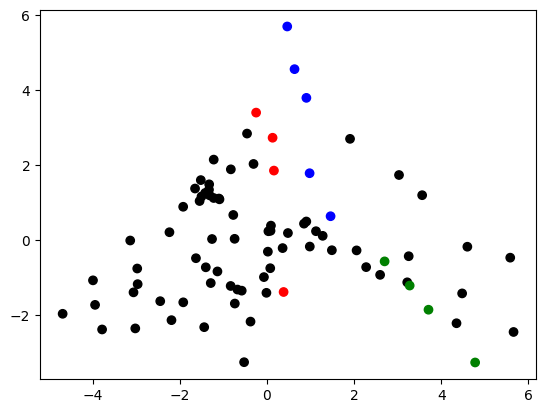

In [9]:
def get_color(row):
    if row['Alkali'] == 1:
        return 'blue'
    elif row['Alkali_Earth'] == 1:
        return 'red'
    elif row['Halogen'] == 1:
        return 'green'
    else:
        return 'black'

# Apply the function to the dataframe to get a list of colors
colors = df.apply(get_color, axis=1)
plt.scatter(df_pca_transformed[:, 0], df_pca_transformed[:, 1], c = colors)

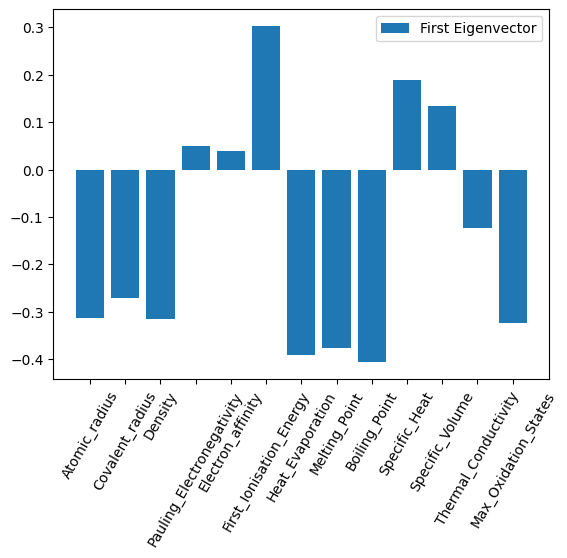

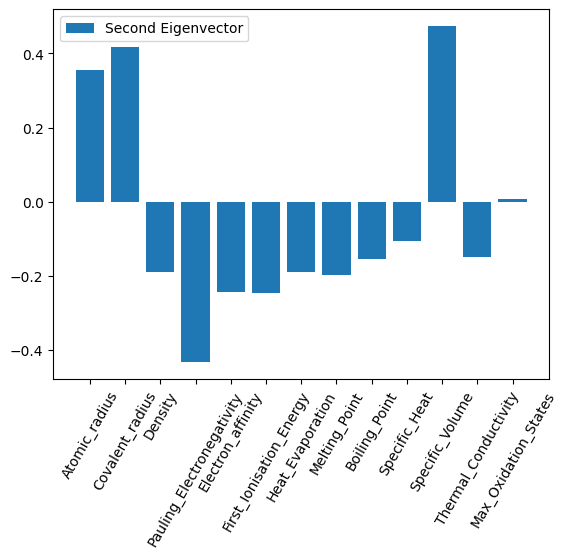

In [10]:
# prompt: Show the first and second eigenvector for PCA as vertical bar plot. Use the labels from df index

eigenvector_values = pca.components_

# Get the labels for the elements, which are the index values of the dataframe
labels = ['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']

# Plot the first and second eigenvector as a bar plot
plt.bar(labels, eigenvector_values[0, :], label='First Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.bar(labels, eigenvector_values[1, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# LDA - Iris

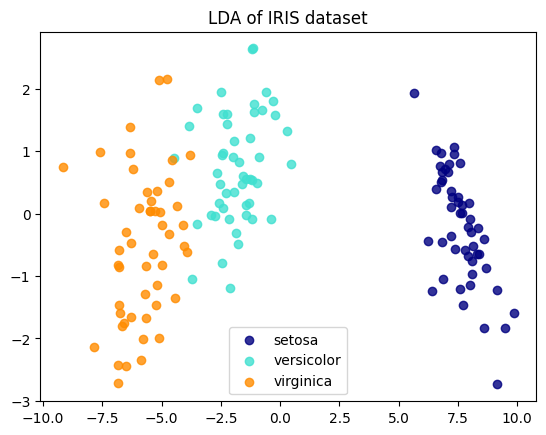

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model and transform the data to LDA coordinates
X_lda = lda.fit_transform(X, y)

# Plotting the data in LDA coordinates
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

# Show the plot
plt.show()

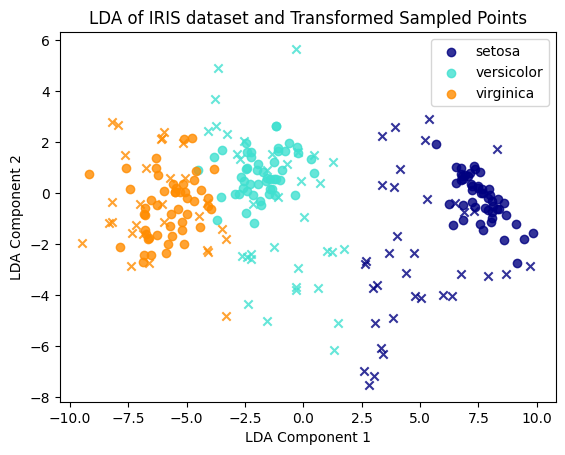

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Sample points in the 4D space
n_samples = 100
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Plot the LDA components of the original dataset
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)

# Plot the transformed sampled points in the LDA components space with their predicted class colors
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_sampled_lda[y_sampled_pred == i, 0], X_sampled_lda[y_sampled_pred == i, 1], alpha=.8, color=color, marker='x')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset and Transformed Sampled Points')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(


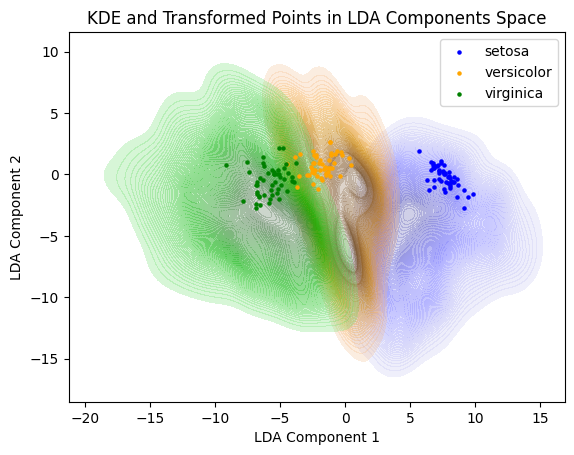

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Transform the original data
X_lda = lda.transform(X)

# Sample points in the 4D space


new_min = X.min(axis=0) * 1.4
new_max = X.max(axis=0) * 1.4

# Sample points in the expanded 4D space
n_samples = 1000
X_sampled = np.random.rand(n_samples, 4) * (new_max - new_min) + new_min

'''
n_samples = 10000
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
'''

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Determine the limits for the axes
x_min = min(X_lda[:, 0].min(), X_sampled_lda[:, 0].min())
x_max = max(X_lda[:, 0].max(), X_sampled_lda[:, 0].max())
y_min = min(X_lda[:, 1].min(), X_sampled_lda[:, 1].min())
y_max = max(X_lda[:, 1].max(), X_sampled_lda[:, 1].max())

# Plot the KDE of the transformed sampled points in the LDA components space with their predicted class colors
colors = ['blue', 'orange', 'green']
for color, i in zip(colors, [0, 1, 2]):
    sns.kdeplot(
        x=X_sampled_lda[y_sampled_pred == i, 0],
        y=X_sampled_lda[y_sampled_pred == i, 1],
        fill=True,
        color=color,
        thresh=0.01,
        levels=100,
        alpha=0.25,
        xlim=(x_min, x_max),
        ylim=(y_min, y_max)
    )

# Plot the transformed original dataset points on the KDE plot
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, label=target_name, s=5)

plt.title('KDE and Transformed Points in LDA Components Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()

# Show the plot
plt.show()

# LDA on Elements

In [14]:
df2.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States,Alkali,Alkali_Earth,Halogen
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1,0,0,0
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2,0,0,0
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1,1,0,0
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2,0,1,0
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3,0,0,0


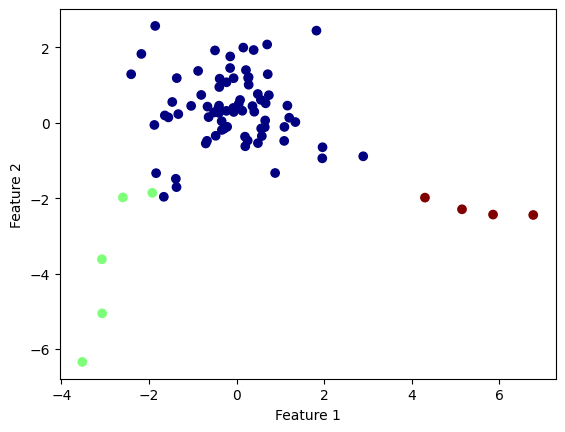

In [15]:
# Import the required libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Create the features and target variables
X = df2[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

y = df2['Alkali'] + 2*df2['Halogen']

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Create the local discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 2)
#pca = PCA(n_components=2)

# Fit the model to the data
lda.fit_transform(X_std, y)

# Predict the labels for the data
y_pred = lda.predict(X_std)
X_t = lda.fit_transform(X_std, y)
#X_t = pca.fit_transform(X_std)

# Plot the decision boundary
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap = "jet")

#plt.scatter(X_t[df2['Alkali_Earth'] == 1, 0], X_t[df2['Alkali_Earth'] == 1, 1], c = 'red', s = 25, marker='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()